# Machine Learning for Nickel Catalyzed Borylation in MeOH

In [10]:
import numpy as np
import pandas as pd
import sklearn

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math as math
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso

### Load Preprocessed Ethanol Dataset

In [3]:
dataset = pd.read_csv("data_MeOH_Final.csv")
dataset.head()

,ArylHalide_CX_Lowdin,ArylHalide_C_Chem Shift,ArylHalide_C_Electrostatic,ArylHalide_C_Exposed Area,ArylHalide_C_Mulliken,ArylHalide_XY_Chem Shift_Max,ArylHalide_XY_Chem Shift_Min,ArylHalide_XY_Electrostatic_Max,ArylHalide_XY_Electrostatic_Min,ArylHalide_XY_Exposed Area_Avg,...,Kraken_vbur_vbur_max,Kraken_vbur_vbur_min,Kraken_vbur_vtot_boltz,Kraken_vmin_r_boltz,Kraken_vmin_vmin_boltz,Ligand,Ligand_inchi,Product_inchi,Solvent_inchi,Yield
0,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,50.731606,50.731606,351.19888,1.840787,-0.055960,A-paPhos,InChI=1S/C20H20NP/c1-21(2)17-13-15-20(16-14-17...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/CH4O/c1-2/h2H,1H3",88.86
1,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,80.673770,61.935337,479.46484,1.803143,-0.058457,CX-FBu,InChI=1S/C29H39P.BF4/c1-2-3-22-29(27-20-12-10-...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/CH4O/c1-2/h2H,1H3",54.07
2,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,107.755370,56.694310,386.44120,1.805810,-0.058387,CX-PCy,InChI=1S/C22H30NP/c1-4-11-19(12-5-1)23-18-10-1...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/CH4O/c1-2/h2H,1H3",74.99
3,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,117.597336,54.091050,618.03375,1.817123,-0.054418,Cy-BippyPhos,InChI=1S/C36H39N4P/c1-6-16-28(17-7-1)34-36(35(...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/CH4O/c1-2/h2H,1H3",82.92
4,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,111.484024,57.033180,402.37967,1.816461,-0.061351,Cy-JohnPhos,InChI=1S/C24H31P/c1-4-12-20(13-5-1)23-18-10-11...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/CH4O/c1-2/h2H,1H3",80.25


### Prepare Hold-out Electrophiles Testing Set¶

In [6]:
dataset.Electrophile.unique().tolist()

['1H-indol-5-yl\xa0N,N-dimethylsulfamate',
 "2-bromo-1,1'-biphenyl",
 '2-Chloro-5-fluorotoluene',
 '2-Chloro-m-xylene',
 '(2-Methyl-1,3-benzothiazol-5-yl)\xa0N,N-dimethylsulfamate',
 '3-Bromothiophene',
 '3-Chloro-2-methylaniline',
 '4-Bromoanisole',
 '4-Bromobenzotrifluoride',
 '4-Chloro-N,N-dimethylbenzamide',
 '5-chloroindole',
 'BMS-929356',
 'Ethyl\xa04-chloro-3-fluorobenzoate',
 'methyl\xa04-bromobenzoate',
 'quinolin-6-yl dimethylsulfamate',
 '3-Bromoquinoline',
 '3-bromo-2-methylpyridine',
 'Clofibrate',
 '4-Bromo-2-fluoroanisole',
 '4-Bromo-2-fluorobenzonitrile',
 '(4-Phenylphenyl) N,N-dimethylsulfamate',
 '4-Bromo-1,2-(methylenedioxy)benzene',
 '5-Bromobenzofuran',
 '4-chloro-1-fluoro-2-methoxybenzene',
 '4-chlorobenzotrifluoride',
 '3-chloroquinoline',
 '5-bromo-2,4-dimethoxypyrimidine',
 'methyl\xa04-chlorobenzoate',
 '5-Chloro-1,3-benzodioxole',
 '4-chloro-2-fluoro-1-methoxybenzene',
 '4-Chloro-2-fluoroanisole',
 '4-Chlorobiphenyl',
 '4-Bromobiphenyl',
 '4-Chloro-2-fluorob

In [4]:
#Retrieve the three electrophiles and store the features in a separate dataframe 
indices=[0,12,17]
mapped = map(dataset.Electrophile.unique().tolist().__getitem__, indices)
external_list=list(mapped)
ML_data_validation = dataset[dataset['Electrophile'].isin(external_list)]
ML_data_validation2 = ML_data_validation.drop(['Electrophile_inchi', 'Solvent_inchi', 'Ligand_inchi', 'Product_inchi', 'Electrophile', 'Ligand'], axis = 1)
print (ML_data_validation2.shape)
ML_data_validation2.head()

(69, 157)


,ArylHalide_CX_Lowdin,ArylHalide_C_Chem Shift,ArylHalide_C_Electrostatic,ArylHalide_C_Exposed Area,ArylHalide_C_Mulliken,ArylHalide_XY_Chem Shift_Max,ArylHalide_XY_Chem Shift_Min,ArylHalide_XY_Electrostatic_Max,ArylHalide_XY_Electrostatic_Min,ArylHalide_XY_Exposed Area_Avg,...,Kraken_vbur_qvtot_min_min,Kraken_vbur_qvtot_min_vburminconf,Kraken_vbur_ratio_vbur_vtot_boltz,Kraken_vbur_vbur_boltz,Kraken_vbur_vbur_max,Kraken_vbur_vbur_min,Kraken_vbur_vtot_boltz,Kraken_vmin_r_boltz,Kraken_vmin_vmin_boltz,Yield
0,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,59.829678,59.829678,0.144453,50.731606,50.731606,50.731606,351.19888,1.840787,-0.055960,88.86
1,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,47.895260,67.167030,0.134809,64.636100,80.673770,61.935337,479.46484,1.803143,-0.058457,54.07
2,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,36.894516,75.417816,0.211005,81.541550,107.755370,56.694310,386.44120,1.805810,-0.058387,74.99
3,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,45.164505,77.044235,0.160584,99.246600,117.597336,54.091050,618.03375,1.817123,-0.054418,82.92
4,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,44.561430,72.197180,0.212085,85.339290,111.484024,57.033180,402.37967,1.816461,-0.061351,80.25


In [5]:
#Keep the rest of the dataset for model training purpose
exclude_list = ML_data_validation.index.values.tolist()
ML_data_traintest = dataset[~dataset.index.isin(exclude_list)]
ML_data_traintest2 = ML_data_traintest.drop(['Electrophile_inchi', 'Solvent_inchi', 'Ligand_inchi', 'Product_inchi', 'Electrophile', 'Ligand'], axis = 1)
print (ML_data_traintest2.shape)
ML_data_traintest2.head()

(710, 157)


,ArylHalide_CX_Lowdin,ArylHalide_C_Chem Shift,ArylHalide_C_Electrostatic,ArylHalide_C_Exposed Area,ArylHalide_C_Mulliken,ArylHalide_XY_Chem Shift_Max,ArylHalide_XY_Chem Shift_Min,ArylHalide_XY_Electrostatic_Max,ArylHalide_XY_Electrostatic_Min,ArylHalide_XY_Exposed Area_Avg,...,Kraken_vbur_qvtot_min_min,Kraken_vbur_qvtot_min_vburminconf,Kraken_vbur_ratio_vbur_vtot_boltz,Kraken_vbur_vbur_boltz,Kraken_vbur_vbur_max,Kraken_vbur_vbur_min,Kraken_vbur_vtot_boltz,Kraken_vmin_r_boltz,Kraken_vmin_vmin_boltz,Yield
23,1.09,136.282,-0.197,7.369,-0.025,139.527,126.017,0.327,0.007,8.957,...,59.829678,59.829678,0.144453,50.731606,50.731606,50.731606,351.19888,1.840787,-0.055960,48.175
24,1.09,136.282,-0.197,7.369,-0.025,139.527,126.017,0.327,0.007,8.957,...,47.895260,67.167030,0.134809,64.636100,80.673770,61.935337,479.46484,1.803143,-0.058457,22.925
25,1.09,136.282,-0.197,7.369,-0.025,139.527,126.017,0.327,0.007,8.957,...,36.894516,75.417816,0.211005,81.541550,107.755370,56.694310,386.44120,1.805810,-0.058387,70.335
26,1.09,136.282,-0.197,7.369,-0.025,139.527,126.017,0.327,0.007,8.957,...,45.164505,77.044235,0.160584,99.246600,117.597336,54.091050,618.03375,1.817123,-0.054418,73.775
27,1.09,136.282,-0.197,7.369,-0.025,139.527,126.017,0.327,0.007,8.957,...,44.561430,72.197180,0.212085,85.339290,111.484024,57.033180,402.37967,1.816461,-0.061351,55.420


In [6]:
Y_train = ML_data_traintest2['Yield']
X_train = ML_data_traintest2.drop(columns=['Yield'])

We will use Pipeline process from Scikit Learn where we can assemble several steps that can be cross-validated together while applying normalization and grid search to find optimal settings for different parameters.

### Lasso

In [8]:
%%time
steps = [('scaler', StandardScaler()), ('model', Lasso())]
pipeline = Pipeline(steps)
parameters = {'model__alpha': np.logspace(-10, 1, 50)}

lasso_search = GridSearchCV(pipeline, 
                         parameters, 
                         cv = 5, 
                         scoring="neg_mean_squared_error", 
                         verbose=3)

lasso_search.fit(X_train, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ...........model__alpha=1e-10;, score=-40015.005 total time=   0.1s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.668e+04, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.243e+04, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=1e-10;, score=-904.505 total time=   0.0s
[CV 3/5] END .............model__alpha=1e-10;, score=-654.863 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.008e+04, tolerance: 4.121e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.060e+04, tolerance: 4.182e+01
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ............model__alpha=1e-10;, score=-1136.364 total time=   0.0s
[CV 5/5] END .............model__alpha=1e-10;, score=-727.533 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.496e+04, tolerance: 3.791e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.668e+04, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=1.67683293681101e-10;, score=-40015.005 total time=   0.0s
[CV 2/5] END model__alpha=1.67683293681101e-10;, score=-904.505 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.243e+04, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.008e+04, tolerance: 4.121e+01
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=1.67683293681101e-10;, score=-654.863 total time=   0.0s
[CV 4/5] END model__alpha=1.67683293681101e-10;, score=-1136.364 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.060e+04, tolerance: 4.182e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.496e+04, tolerance: 3.791e+01
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=1.67683293681101e-10;, score=-727.533 total time=   0.0s
[CV 1/5] END model__alpha=2.811768697974225e-10;, score=-40015.004 total time=   0.1s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.668e+04, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.243e+04, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=2.811768697974225e-10;, score=-904.505 total time=   0.0s
[CV 3/5] END model__alpha=2.811768697974225e-10;, score=-654.863 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.008e+04, tolerance: 4.121e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.060e+04, tolerance: 4.182e+01
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=2.811768697974225e-10;, score=-1136.364 total time=   0.0s
[CV 5/5] END model__alpha=2.811768697974225e-10;, score=-727.533 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.496e+04, tolerance: 3.791e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.668e+04, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=4.71486636345739e-10;, score=-40015.004 total time=   0.0s
[CV 2/5] END model__alpha=4.71486636345739e-10;, score=-904.505 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.243e+04, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.008e+04, tolerance: 4.121e+01
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=4.71486636345739e-10;, score=-654.863 total time=   0.0s
[CV 4/5] END model__alpha=4.71486636345739e-10;, score=-1136.364 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.060e+04, tolerance: 4.182e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.496e+04, tolerance: 3.791e+01
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=4.71486636345739e-10;, score=-727.533 total time=   0.0s
[CV 1/5] END model__alpha=7.906043210907701e-10;, score=-40015.003 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.668e+04, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.243e+04, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=7.906043210907701e-10;, score=-904.505 total time=   0.0s
[CV 3/5] END model__alpha=7.906043210907701e-10;, score=-654.863 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.008e+04, tolerance: 4.121e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.060e+04, tolerance: 4.182e+01
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=7.906043210907701e-10;, score=-1136.364 total time=   0.0s
[CV 5/5] END model__alpha=7.906043210907701e-10;, score=-727.533 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.496e+04, tolerance: 3.791e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.668e+04, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=1.3257113655901108e-09;, score=-40015.003 total time=   0.0s
[CV 2/5] END model__alpha=1.3257113655901108e-09;, score=-904.505 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.243e+04, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.008e+04, tolerance: 4.121e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 3/5] END model__alpha=1.3257113655901108e-09;, score=-654.863 total time=   0.0s
[CV 4/5] END model__alpha=1.3257113655901108e-09;, score=-1136.364 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.496e+04, tolerance: 3.791e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.668e+04, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=1.3257113655901108e-09;, score=-727.533 total time=   0.0s
[CV 1/5] END model__alpha=2.222996482526191e-09;, score=-40015.001 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.243e+04, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.008e+04, tolerance: 4.121e+01
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=2.222996482526191e-09;, score=-904.505 total time=   0.0s
[CV 3/5] END model__alpha=2.222996482526191e-09;, score=-654.863 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.060e+04, tolerance: 4.182e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.496e+04, tolerance: 3.791e+01
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=2.222996482526191e-09;, score=-1136.364 total time=   0.0s
[CV 5/5] END model__alpha=2.222996482526191e-09;, score=-727.533 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.668e+04, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.243e+04, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=3.727593720314938e-09;, score=-40014.998 total time=   0.0s
[CV 2/5] END model__alpha=3.727593720314938e-09;, score=-904.505 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.008e+04, tolerance: 4.121e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.060e+04, tolerance: 4.182e+01
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=3.727593720314938e-09;, score=-654.863 total time=   0.0s
[CV 4/5] END model__alpha=3.727593720314938e-09;, score=-1136.363 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.496e+04, tolerance: 3.791e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.668e+04, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 5/5] END model__alpha=3.727593720314938e-09;, score=-727.533 total time=   0.0s
[CV 1/5] END model__alpha=6.250551925273976e-09;, score=-40014.994 total time=   0.0s
[CV 2/5] END model__alpha=6.250551925273976e-09;, score=-904.505 total time=   0.0s
[CV 3/5] END model__alpha=6.250551925273976e-09;, score=-654.863 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.008e+04, tolerance: 4.121e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.060e+04, tolerance: 4.182e+01
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=6.250551925273976e-09;, score=-1136.363 total time=   0.0s
[CV 5/5] END model__alpha=6.250551925273976e-09;, score=-727.533 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.496e+04, tolerance: 3.791e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.668e+04, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=1.0481131341546852e-08;, score=-40014.987 total time=   0.0s
[CV 2/5] END model__alpha=1.0481131341546852e-08;, score=-904.504 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.243e+04, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.008e+04, tolerance: 4.121e+01
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=1.0481131341546852e-08;, score=-654.863 total time=   0.0s
[CV 4/5] END model__alpha=1.0481131341546852e-08;, score=-1136.363 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.060e+04, tolerance: 4.182e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.496e+04, tolerance: 3.791e+01
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=1.0481131341546852e-08;, score=-727.533 total time=   0.0s
[CV 1/5] END model__alpha=1.7575106248547893e-08;, score=-40014.975 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.668e+04, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.243e+04, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=1.7575106248547893e-08;, score=-904.504 total time=   0.0s
[CV 3/5] END model__alpha=1.7575106248547893e-08;, score=-654.863 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.008e+04, tolerance: 4.121e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.060e+04, tolerance: 4.182e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 4/5] END model__alpha=1.7575106248547893e-08;, score=-1136.363 total time=   0.0s
[CV 5/5] END model__alpha=1.7575106248547893e-08;, score=-727.533 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.668e+04, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.243e+04, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=2.9470517025518096e-08;, score=-40014.955 total time=   0.1s
[CV 2/5] END model__alpha=2.9470517025518096e-08;, score=-904.504 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.008e+04, tolerance: 4.121e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.060e+04, tolerance: 4.182e+01
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=2.9470517025518096e-08;, score=-654.863 total time=   0.0s
[CV 4/5] END model__alpha=2.9470517025518096e-08;, score=-1136.363 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.496e+04, tolerance: 3.791e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.668e+04, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=2.9470517025518096e-08;, score=-727.533 total time=   0.0s
[CV 1/5] END model__alpha=4.9417133613238385e-08;, score=-40014.921 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.243e+04, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.008e+04, tolerance: 4.121e+01
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=4.9417133613238385e-08;, score=-904.504 total time=   0.0s
[CV 3/5] END model__alpha=4.9417133613238385e-08;, score=-654.862 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.060e+04, tolerance: 4.182e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.496e+04, tolerance: 3.791e+01
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=4.9417133613238385e-08;, score=-1136.362 total time=   0.0s
[CV 5/5] END model__alpha=4.9417133613238385e-08;, score=-727.533 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.668e+04, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.243e+04, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=8.286427728546843e-08;, score=-40014.864 total time=   0.0s
[CV 2/5] END model__alpha=8.286427728546843e-08;, score=-904.503 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.008e+04, tolerance: 4.121e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.060e+04, tolerance: 4.182e+01
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=8.286427728546843e-08;, score=-654.862 total time=   0.0s
[CV 4/5] END model__alpha=8.286427728546843e-08;, score=-1136.362 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.496e+04, tolerance: 3.791e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.668e+04, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=8.286427728546843e-08;, score=-727.533 total time=   0.0s
[CV 1/5] END model__alpha=1.389495494373136e-07;, score=-40014.769 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.243e+04, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.008e+04, tolerance: 4.121e+01
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=1.389495494373136e-07;, score=-904.502 total time=   0.0s
[CV 3/5] END model__alpha=1.389495494373136e-07;, score=-654.862 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.060e+04, tolerance: 4.182e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.496e+04, tolerance: 3.791e+01
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=1.389495494373136e-07;, score=-1136.360 total time=   0.0s
[CV 5/5] END model__alpha=1.389495494373136e-07;, score=-727.533 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.668e+04, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.243e+04, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=2.329951810515372e-07;, score=-40014.609 total time=   0.0s
[CV 2/5] END model__alpha=2.329951810515372e-07;, score=-904.500 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.008e+04, tolerance: 4.121e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.060e+04, tolerance: 4.182e+01
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=2.329951810515372e-07;, score=-654.862 total time=   0.0s
[CV 4/5] END model__alpha=2.329951810515372e-07;, score=-1136.358 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.496e+04, tolerance: 3.791e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.668e+04, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=2.329951810515372e-07;, score=-727.533 total time=   0.0s
[CV 1/5] END model__alpha=3.906939937054621e-07;, score=-40014.342 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.243e+04, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.008e+04, tolerance: 4.121e+01
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=3.906939937054621e-07;, score=-904.497 total time=   0.0s
[CV 3/5] END model__alpha=3.906939937054621e-07;, score=-654.862 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.060e+04, tolerance: 4.182e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.496e+04, tolerance: 3.791e+01
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=3.906939937054621e-07;, score=-1136.354 total time=   0.0s
[CV 5/5] END model__alpha=3.906939937054621e-07;, score=-727.533 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.668e+04, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.243e+04, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=6.55128556859551e-07;, score=-40013.893 total time=   0.0s
[CV 2/5] END model__alpha=6.55128556859551e-07;, score=-904.492 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.008e+04, tolerance: 4.121e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.060e+04, tolerance: 4.182e+01
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=6.55128556859551e-07;, score=-654.861 total time=   0.0s
[CV 4/5] END model__alpha=6.55128556859551e-07;, score=-1136.348 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.496e+04, tolerance: 3.791e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.668e+04, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=6.55128556859551e-07;, score=-727.532 total time=   0.0s
[CV 1/5] END model__alpha=1.0985411419875572e-06;, score=-40013.141 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.243e+04, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.008e+04, tolerance: 4.121e+01
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=1.0985411419875572e-06;, score=-904.483 total time=   0.0s
[CV 3/5] END model__alpha=1.0985411419875572e-06;, score=-654.860 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.060e+04, tolerance: 4.182e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.495e+04, tolerance: 3.791e+01
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=1.0985411419875572e-06;, score=-1136.337 total time=   0.0s
[CV 5/5] END model__alpha=1.0985411419875572e-06;, score=-727.532 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.667e+04, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.243e+04, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=1.8420699693267164e-06;, score=-40011.879 total time=   0.0s
[CV 2/5] END model__alpha=1.8420699693267164e-06;, score=-904.468 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.008e+04, tolerance: 4.121e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.060e+04, tolerance: 4.182e+01
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=1.8420699693267164e-06;, score=-654.857 total time=   0.0s
[CV 4/5] END model__alpha=1.8420699693267164e-06;, score=-1136.319 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.495e+04, tolerance: 3.791e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.667e+04, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 5/5] END model__alpha=1.8420699693267164e-06;, score=-727.531 total time=   0.0s
[CV 1/5] END model__alpha=3.0888435964774785e-06;, score=-40009.763 total time=   0.0s
[CV 2/5] END model__alpha=3.0888435964774785e-06;, score=-904.443 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.007e+04, tolerance: 4.121e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.059e+04, tolerance: 4.182e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 3/5] END model__alpha=3.0888435964774785e-06;, score=-654.854 total time=   0.0s
[CV 4/5] END model__alpha=3.0888435964774785e-06;, score=-1136.289 total time=   0.0s
[CV 5/5] END model__alpha=3.0888435964774785e-06;, score=-727.529 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.667e+04, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.242e+04, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 1/5] END model__alpha=5.179474679231212e-06;, score=-40006.216 total time=   0.0s
[CV 2/5] END model__alpha=5.179474679231212e-06;, score=-904.402 total time=   0.0s
[CV 3/5] END model__alpha=5.179474679231212e-06;, score=-654.848 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.058e+04, tolerance: 4.182e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.493e+04, tolerance: 3.791e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 4/5] END model__alpha=5.179474679231212e-06;, score=-1136.239 total time=   0.0s
[CV 5/5] END model__alpha=5.179474679231212e-06;, score=-727.527 total time=   0.0s
[CV 1/5] END model__alpha=8.68511373751352e-06;, score=-40000.268 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.240e+04, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.005e+04, tolerance: 4.121e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 2/5] END model__alpha=8.68511373751352e-06;, score=-904.332 total time=   0.0s
[CV 3/5] END model__alpha=8.68511373751352e-06;, score=-654.838 total time=   0.0s
[CV 4/5] END model__alpha=8.68511373751352e-06;, score=-1136.155 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.492e+04, tolerance: 3.791e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.664e+04, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 5/5] END model__alpha=8.68511373751352e-06;, score=-727.523 total time=   0.0s
[CV 1/5] END model__alpha=1.4563484775012445e-05;, score=-39990.294 total time=   0.0s
[CV 2/5] END model__alpha=1.4563484775012445e-05;, score=-904.215 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.002e+04, tolerance: 4.121e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.054e+04, tolerance: 4.182e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 3/5] END model__alpha=1.4563484775012445e-05;, score=-654.822 total time=   0.0s
[CV 4/5] END model__alpha=1.4563484775012445e-05;, score=-1136.013 total time=   0.0s
[CV 5/5] END model__alpha=1.4563484775012445e-05;, score=-727.516 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.661e+04, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.235e+04, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 1/5] END model__alpha=2.4420530945486497e-05;, score=-39973.575 total time=   0.0s
[CV 2/5] END model__alpha=2.4420530945486497e-05;, score=-904.019 total time=   0.0s
[CV 3/5] END model__alpha=2.4420530945486497e-05;, score=-654.794 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.050e+04, tolerance: 4.182e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.484e+04, tolerance: 3.791e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 4/5] END model__alpha=2.4420530945486497e-05;, score=-1135.776 total time=   0.0s
[CV 5/5] END model__alpha=2.4420530945486497e-05;, score=-727.504 total time=   0.0s
[CV 1/5] END model__alpha=4.094915062380427e-05;, score=-39945.531 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.229e+04, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.990e+04, tolerance: 4.121e+01
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=4.094915062380427e-05;, score=-903.690 total time=   0.0s
[CV 3/5] END model__alpha=4.094915062380427e-05;, score=-654.748 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.044e+04, tolerance: 4.182e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.476e+04, tolerance: 3.791e+01
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=4.094915062380427e-05;, score=-1135.380 total time=   0.0s
[CV 5/5] END model__alpha=4.094915062380427e-05;, score=-727.484 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.649e+04, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.219e+04, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 1/5] END model__alpha=6.866488450042999e-05;, score=-39898.537 total time=   0.0s
[CV 2/5] END model__alpha=6.866488450042999e-05;, score=-903.140 total time=   0.0s
[CV 3/5] END model__alpha=6.866488450042999e-05;, score=-654.671 total time=   0.0s
[CV 4/5] END model__alpha=6.866488450042999e-05;, score=-1134.712 total time=   0.0s
[CV 5/5] END model__alpha=6.866488450042999e-05;, score=-727.450 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.032e+04, tolerance: 4.182e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.462e+04, tolerance: 3.791e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 1/5] END model__alpha=0.00011513953993264481;, score=-39819.847 total time=   0.0s
[CV 2/5] END model__alpha=0.00011513953993264481;, score=-902.218 total time=   0.0s
[CV 3/5] END model__alpha=0.00011513953993264481;, score=-654.545 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.202e+04, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.957e+04, tolerance: 4.121e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 4/5] END model__alpha=0.00011513953993264481;, score=-1133.597 total time=   0.0s
[CV 5/5] END model__alpha=0.00011513953993264481;, score=-727.397 total time=   0.0s
[CV 1/5] END model__alpha=0.00019306977288832496;, score=-39688.072 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.440e+04, tolerance: 3.791e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.616e+04, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 2/5] END model__alpha=0.00019306977288832496;, score=-900.679 total time=   0.0s
[CV 3/5] END model__alpha=0.00019306977288832496;, score=-654.333 total time=   0.0s
[CV 4/5] END model__alpha=0.00019306977288832496;, score=-1131.730 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.922e+04, tolerance: 4.121e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.980e+04, tolerance: 4.182e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 5/5] END model__alpha=0.00019306977288832496;, score=-727.302 total time=   0.0s
[CV 1/5] END model__alpha=0.00032374575428176466;, score=-39467.846 total time=   0.0s
[CV 2/5] END model__alpha=0.00032374575428176466;, score=-898.102 total time=   0.0s
[CV 3/5] END model__alpha=0.00032374575428176466;, score=-653.983 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.126e+04, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.862e+04, tolerance: 4.121e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 4/5] END model__alpha=0.00032374575428176466;, score=-1128.611 total time=   0.0s
[CV 5/5] END model__alpha=0.00032374575428176466;, score=-727.147 total time=   0.0s
[CV 1/5] END model__alpha=0.0005428675439323859;, score=-39100.387 total time=   0.0s
[CV 2/5] END model__alpha=0.0005428675439323859;, score=-893.807 total time=   0.0s

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.339e+04, tolerance: 3.791e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.521e+04, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali


[CV 3/5] END model__alpha=0.0005428675439323859;, score=-653.423 total time=   0.0s
[CV 4/5] END model__alpha=0.0005428675439323859;, score=-1123.379 total time=   0.0s
[CV 5/5] END model__alpha=0.0005428675439323859;, score=-726.879 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.832e+04, tolerance: 4.182e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.234e+04, tolerance: 3.791e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 1/5] END model__alpha=0.0009102981779915227;, score=-38490.207 total time=   0.0s
[CV 2/5] END model__alpha=0.0009102981779915227;, score=-886.695 total time=   0.0s
[CV 3/5] END model__alpha=0.0009102981779915227;, score=-652.374 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.591e+04, tolerance: 4.121e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.673e+04, tolerance: 4.182e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 4/5] END model__alpha=0.0009102981779915227;, score=-1114.692 total time=   0.0s
[CV 5/5] END model__alpha=0.0009102981779915227;, score=-726.456 total time=   0.0s
[CV 1/5] END model__alpha=0.0015264179671752333;, score=-37527.848 total time=   0.0s
[CV 2/5] END model__alpha=0.0015264179671752333;, score=-874.953 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.676e+04, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.292e+04, tolerance: 4.121e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 3/5] END model__alpha=0.0015264179671752333;, score=-650.183 total time=   0.0s
[CV 4/5] END model__alpha=0.0015264179671752333;, score=-1099.513 total time=   0.0s
[CV 5/5] END model__alpha=0.0015264179671752333;, score=-725.743 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.781e+04, tolerance: 3.791e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.972e+04, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=0.0025595479226995332;, score=-35975.099 total time=   0.0s
[CV 2/5] END model__alpha=0.0025595479226995332;, score=-855.746 total time=   0.0s
[CV 3/5] END model__alpha=0.0025595479226995332;, score=-645.802 total time=   0.0s
[CV 4/5] END model__alpha=0.0025595479226995332;, score=-1074.005 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.275e+04, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.768e+04, tolerance: 4.121e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 5/5] END model__alpha=0.0025595479226995332;, score=-724.713 total time=   0.0s
[CV 1/5] END model__alpha=0.004291934260128779;, score=-33402.727 total time=   0.0s
[CV 2/5] END model__alpha=0.004291934260128779;, score=-825.100 total time=   0.0s
[CV 3/5] END model__alpha=0.004291934260128779;, score=-635.721 total time=   0.0s

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.521e+04, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.577e+04, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali


[CV 4/5] END model__alpha=0.004291934260128779;, score=-1041.091 total time=   0.0s
[CV 5/5] END model__alpha=0.004291934260128779;, score=-724.043 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.004e+04, tolerance: 4.182e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.615e+04, tolerance: 3.791e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 1/5] END model__alpha=0.007196856730011514;, score=-29405.184 total time=   0.0s
[CV 2/5] END model__alpha=0.007196856730011514;, score=-777.637 total time=   0.0s
[CV 3/5] END model__alpha=0.007196856730011514;, score=-611.641 total time=   0.0s
[CV 4/5] END model__alpha=0.007196856730011514;, score=-988.545 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.747e+04, tolerance: 4.121e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.355e+04, tolerance: 4.182e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 5/5] END model__alpha=0.007196856730011514;, score=-723.355 total time=   0.0s
[CV 1/5] END model__alpha=0.012067926406393264;, score=-23644.527 total time=   0.0s
[CV 2/5] END model__alpha=0.012067926406393264;, score=-724.107 total time=   0.0s
[CV 3/5] END model__alpha=0.012067926406393264;, score=-583.662 total time=   0.0s
[CV 4/5] END model__alpha=0.012067926406393264;, score=-917.347 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.573e+04, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.564e+04, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 5/5] END model__alpha=0.012067926406393264;, score=-722.308 total time=   0.0s
[CV 1/5] END model__alpha=0.020235896477251554;, score=-17141.365 total time=   0.0s
[CV 2/5] END model__alpha=0.020235896477251554;, score=-640.357 total time=   0.0s
[CV 3/5] END model__alpha=0.020235896477251554;, score=-568.608 total time=   0.0s
[CV 4/5] END model__alpha=0.020235896477251554;, score=-823.111 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.806e+04, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.504e+04, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 5/5] END model__alpha=0.020235896477251554;, score=-716.721 total time=   0.0s
[CV 1/5] END model__alpha=0.0339322177189533;, score=-9444.797 total time=   0.0s
[CV 2/5] END model__alpha=0.0339322177189533;, score=-537.937 total time=   0.0s
[CV 3/5] END model__alpha=0.0339322177189533;, score=-658.886 total time=   0.0s
[CV 4/5] END model__alpha=0.0339322177189533;, score=-779.684 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.772e+03, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.765e+03, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 5/5] END model__alpha=0.0339322177189533;, score=-714.020 total time=   0.0s
[CV 1/5] END model__alpha=0.05689866029018305;, score=-3528.288 total time=   0.0s
[CV 2/5] END model__alpha=0.05689866029018305;, score=-457.089 total time=   0.0s
[CV 3/5] END model__alpha=0.05689866029018305;, score=-586.000 total time=   0.0s
[CV 4/5] END model__alpha=0.05689866029018305;, score=-762.866 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.733e+02, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.204e+03, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 5/5] END model__alpha=0.05689866029018305;, score=-707.196 total time=   0.0s
[CV 1/5] END model__alpha=0.09540954763499924;, score=-1014.283 total time=   0.0s
[CV 2/5] END model__alpha=0.09540954763499924;, score=-409.840 total time=   0.0s
[CV 3/5] END model__alpha=0.09540954763499924;, score=-579.121 total time=   0.0s
[CV 4/5] END model__alpha=0.09540954763499924;, score=-670.525 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.651e+01, tolerance: 3.791e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.544e+02, tolerance: 4.304e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 5/5] END model__alpha=0.09540954763499924;, score=-701.181 total time=   0.0s
[CV 1/5] END model__alpha=0.15998587196060574;, score=-722.040 total time=   0.0s
[CV 2/5] END model__alpha=0.15998587196060574;, score=-361.338 total time=   0.0s
[CV 3/5] END model__alpha=0.15998587196060574;, score=-624.567 total time=   0.0s
[CV 4/5] END model__alpha=0.15998587196060574;, score=-612.973 total time=   0.0s
[CV 5/5] END model__alpha=0.15998587196060574;, score=-685.874 total time=   0.0s
[CV 1/5] END model__alpha=0.26826957952797276;, score=-1056.396 total time=   0.0s
[CV 2/5] END model__alpha=0.26826957952797276;, score=-360.323 total time=   0.0s
[CV 3/5] END model__alpha=0.26826957952797276;, score=-675.894 total time=   0.0s
[CV 4/5] END model__alpha=0.26826957952797276;, score=-608.134 total time=   0.0s
[CV 5/5] END model__alpha=0.26826957952797276;, score=-648.513 total time=   0.0s
[CV 1/5] END model__alpha=0.4498432668969453;, score=-1021.564 total time=   0.0s
[CV 2/5] END mo

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.240e+01, tolerance: 5.034e+01
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([1.00000000e-10, 1.67683294e-10, 2.81176870e-10, 4.71486636e-10,
       7.90604321e-10, 1.32571137e-09, 2.22299648e-09, 3.72759372e-09,
       6.25055193e-09, 1.04811313e-08, 1.75751062e-08, 2.94705170e-08,
       4.94171336e-08, 8.28642773e-08, 1.38949549e-07...
       1.93069773e-04, 3.23745754e-04, 5.42867544e-04, 9.10298178e-04,
       1.52641797e-03, 2.55954792e-03, 4.29193426e-03, 7.19685673e-03,
       1.20679264e-02, 2.02358965e-02, 3.39322177e-02, 5.68986603e-02,
       9.54095476e-02, 1.59985872e-01, 2.68269580e-01, 4.49843267e-01,
       7.54312006e-01, 1.26485522e+00, 2.12095089e+00, 3.55648031e+00,
       5.96362332e+00, 1.00000000e+01])},
             scoring='neg_mean_squared_error', verbose=3)

In [9]:
lasso_search.best_params_

{'model__alpha': 0.15998587196060574}

In [10]:
lasso_search.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', Lasso(alpha=0.15998587196060574))])

### Hold-out Electrophiles Testing set Evaluation

In [14]:
ext_y=ML_data_validation2['Yield']
ext_X=ML_data_validation2.iloc[:, ML_data_validation2.columns.isin(X_train.columns)]

In [ ]:
Y_Pred = lasso_search.best_estimator_.predict(ext_X)

In [12]:
mse = mean_squared_error(ext_y, Y_Pred)
print(math.sqrt(mse))

21.301361092063892


### Plot Parity Plot

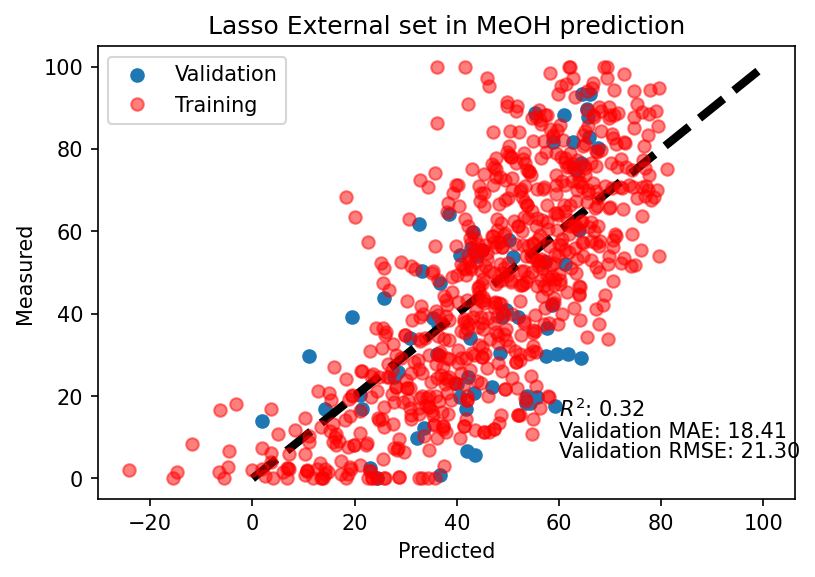

In [13]:
plt.rcParams['figure.dpi'] = 150
fig, ax = plt.subplots()
ax.scatter(Y_Pred,ext_y,label="Validation")
ax.plot( [0,100],[0,100], 'k--', lw=4)
ax.plot(lasso_search.best_estimator_.predict(X_train), Y_train, "or", alpha=0.5, label="Training")
ax.text(60,15,r'$R^2$: {:0.2f}'.format(r2_score(ext_y,Y_Pred)))
ax.text(60,10,'Validation MAE: {:0.2f}'.format(mean_absolute_error(Y_Pred,ext_y)))
ax.text(60,5,'Validation RMSE: {:0.2f}'.format(np.sqrt(mean_squared_error(Y_Pred,ext_y))))
ax.set_xlabel('Predicted')
ax.set_ylabel('Measured')
ax.set_title('Lasso External set in MeOH prediction')
plt.legend()
plt.show()

<AxesSubplot:ylabel='feature'>

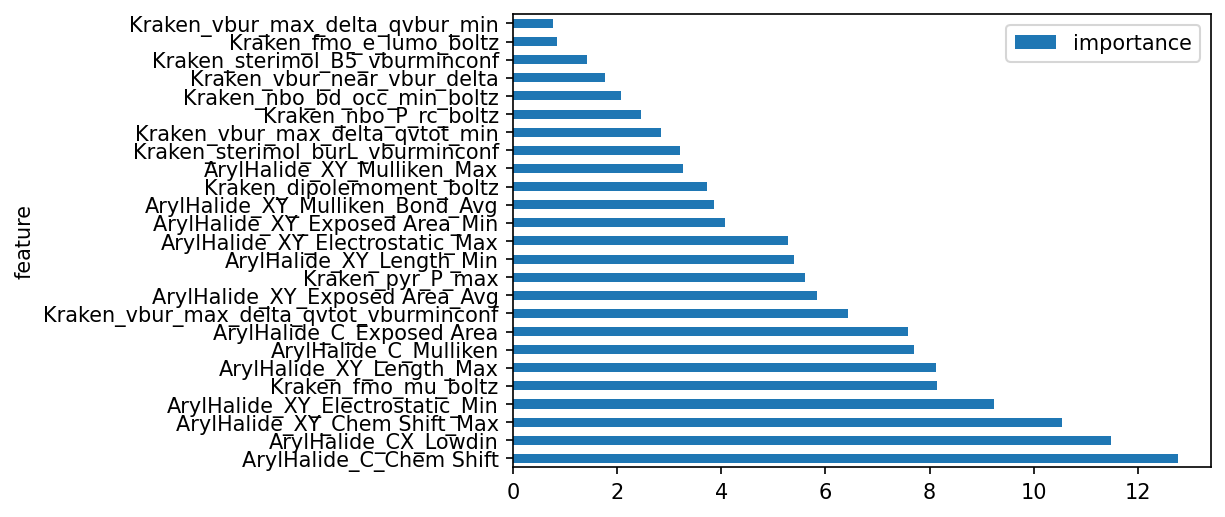

In [14]:
#Top features from Lasso regression, pls note they are quite different from other tree-based ensemble models
coefs=lasso_search.best_estimator_.named_steps['model'].coef_
importance=np.abs(coefs)
features=X_train.columns

df=pd.DataFrame(zip(features,importance))
df2 = df.sort_values(by=[1], ascending=False).head(25)
df2.columns = ['feature', 'importance']
df2.set_index('feature',inplace=True)
df2.plot(kind='barh')

### Random Forest Regression

In [2]:
import numpy as np

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
from sklearn.model_selection import RandomizedSearchCV

In [16]:
%%time
rng = np.random.RandomState(0)
steps_rf = [('scaler', StandardScaler()), ('Forest', RandomForestRegressor(random_state=rng))]
pipeline_rf = Pipeline(steps_rf)
parameters_rf = {'Forest__n_estimators': [int(x) for x in np.linspace(start = 200, stop = 3100, num = 100)],
              'Forest__max_features': ['auto', 'sqrt','log2', None],
              'Forest__max_depth': [int(x) for x in np.linspace(10, 210, num = 21)],
              'Forest__min_samples_split': [2, 5, 10, 15],
              'Forest__min_samples_leaf': [1, 2, 4, 10, 20],
              'Forest__bootstrap': [True, False]}

rf_random = RandomizedSearchCV(pipeline_rf, 
                               parameters_rf, 
                               n_iter=20, 
                               cv = 5, 
                               random_state = 422, 
                               n_jobs = -1)

rf_random.fit(X_train, Y_train)

CPU times: total: 2.33 s
Wall time: 14min 25s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('Forest',
                                              RandomForestRegressor(random_state=RandomState(MT19937) at 0x1A34ED34040))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'Forest__bootstrap': [True, False],
                                        'Forest__max_depth': [10, 20, 30, 40,
                                                              50, 60, 70, 80,
                                                              90, 100, 110, 120,
                                                              130, 140, 150,
                                                              160, 170, 180,
                                                              190, 200, 210],
                                        'Forest__max_features': ['auto', 'sqrt',
                                                                 'log2', None],
                                        'Forest__min_samples_leaf': [1, 2, 4,
                                                                     10, 20],
                                        'Forest__min_samples_split': [2, 5, 10,
                                                                      15],
                                        'Forest__n_estimators': [200, 229, 258,
                                                                 287, 317, 346,
                                                                 375, 405, 434,
                                                                 463, 492, 522,
                                                                 551, 580, 610,
                                                                 639, 668, 697,
                                                                 727, 756, 785,
                                                                 815, 844, 873,
                                                                 903, 932, 961,
                                                                 990, 1020,
                                                                 1049, ...]},
                   random_state=422)

In [19]:
rf_random.best_params_

{'Forest__n_estimators': 610,
 'Forest__min_samples_split': 15,
 'Forest__min_samples_leaf': 1,
 'Forest__max_features': 'log2',
 'Forest__max_depth': 10,
 'Forest__bootstrap': True}

In [20]:
rf_random.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('Forest',
                 RandomForestRegressor(max_depth=10, max_features='log2',
                                       min_samples_split=15, n_estimators=610,
                                       random_state=RandomState(MT19937) at 0x1A34ED34340))])

In [21]:
Y_Pred_rf = rf_random.best_estimator_.predict(ext_X)

In [22]:
mse_rf = mean_squared_error(ext_y, Y_Pred_rf)
print(math.sqrt(mse_rf))

21.70249614693406


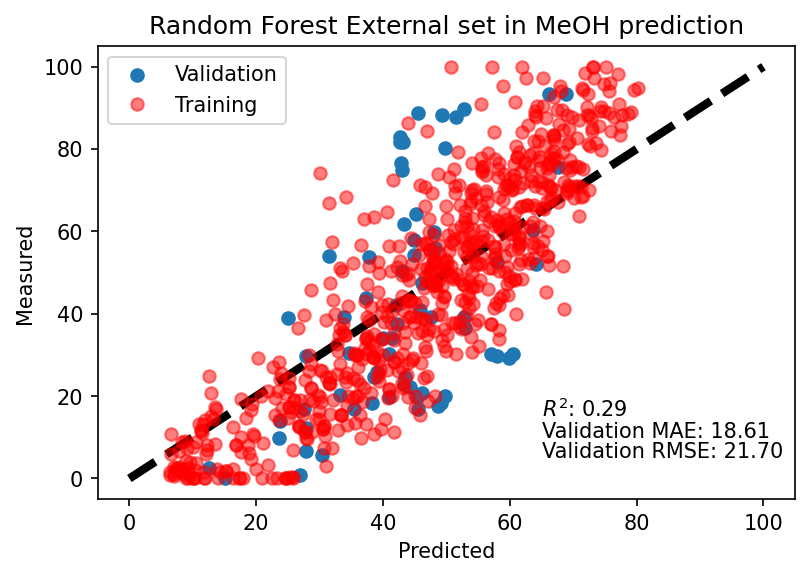

In [23]:
plt.rcParams['figure.dpi'] = 150
fig, ax = plt.subplots()
ax.scatter(Y_Pred_rf,ext_y,label="Validation")
ax.plot( [0,100],[0,100], 'k--', lw=4)
ax.plot(rf_random.best_estimator_.predict(X_train), Y_train, "or", alpha=0.5, label="Training")
ax.text(65,15,r'$R^2$: {:0.2f}'.format(r2_score(ext_y,Y_Pred_rf)))
ax.text(65,10,'Validation MAE: {:0.2f}'.format(mean_absolute_error(Y_Pred_rf,ext_y)))
ax.text(65,5,'Validation RMSE: {:0.2f}'.format(np.sqrt(mean_squared_error(Y_Pred_rf,ext_y))))
ax.set_xlabel('Predicted')
ax.set_ylabel('Measured')
ax.set_title('Random Forest External set in MeOH prediction')
plt.legend()
plt.show()

In [24]:
sorted_idx_rf = rf_random.best_estimator_.named_steps["Forest"].feature_importances_.argsort()

<AxesSubplot:ylabel='feature'>

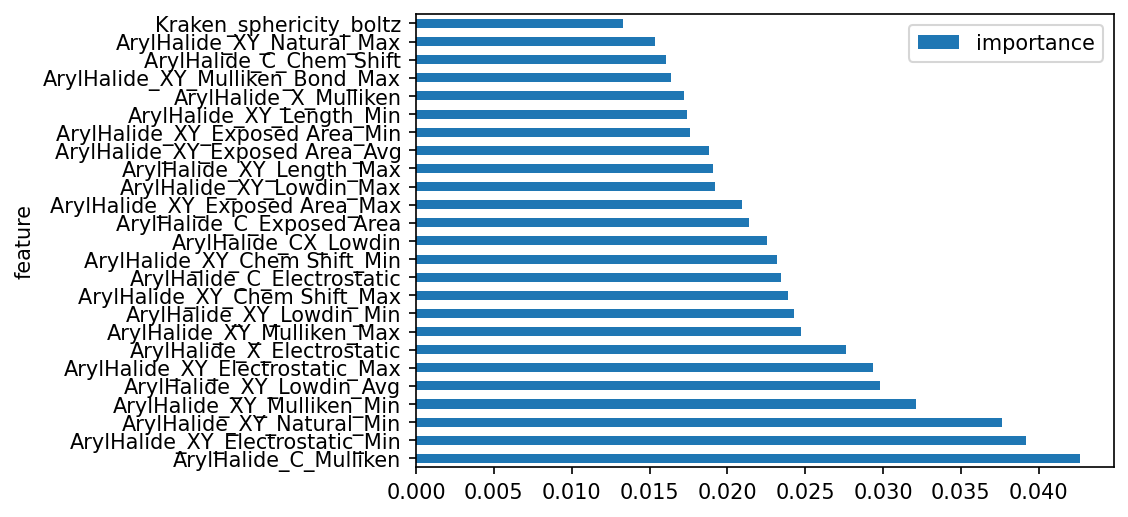

In [26]:
df_rf=pd.DataFrame(list(zip(X_train.columns[sorted_idx_rf], 
                      rf_random.best_estimator_.named_steps["Forest"].feature_importances_[sorted_idx_rf])))
df_rf.sort_values(by=[1], ascending=False).head(50)
df2_rf = df_rf.sort_values(by=[1], ascending=False).head(25)
df2_rf.columns = ['feature', 'importance']
df2_rf.set_index('feature',inplace=True)
df2_rf.plot(kind='barh')

### SVM 

In [8]:
from sklearn.svm import SVR

In [11]:
%%time
steps_svm = [('scaler', StandardScaler()), ('model', SVR())]
pipeline_svm = Pipeline(steps_svm)
parameters_svm = {'model__C': [0.1, 1, 10, 100], 
              'model__gamma': [1,0.1,0.01,0.001],
              'model__kernel': ['rbf', 'poly', 'sigmoid']}

svm_search = GridSearchCV(pipeline_svm, 
                         parameters_svm, 
                         cv = 5, 
                         scoring="neg_mean_squared_error", 
                         verbose=3)

svm_search.fit(X_train, Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END model__C=0.1, model__gamma=1, model__kernel=rbf;, score=-1121.914 total time=   0.0s
[CV 2/5] END model__C=0.1, model__gamma=1, model__kernel=rbf;, score=-498.565 total time=   0.0s
[CV 3/5] END model__C=0.1, model__gamma=1, model__kernel=rbf;, score=-637.617 total time=   0.0s
[CV 4/5] END model__C=0.1, model__gamma=1, model__kernel=rbf;, score=-609.512 total time=   0.0s
[CV 5/5] END model__C=0.1, model__gamma=1, model__kernel=rbf;, score=-874.067 total time=   0.0s
[CV 1/5] END model__C=0.1, model__gamma=1, model__kernel=poly;, score=-33885.636 total time=   5.3s
[CV 2/5] END model__C=0.1, model__gamma=1, model__kernel=poly;, score=-3253.603 total time=   2.7s
[CV 3/5] END model__C=0.1, model__gamma=1, model__kernel=poly;, score=-6423.155 total time=   3.6s
[CV 4/5] END model__C=0.1, model__gamma=1, model__kernel=poly;, score=-30557.506 total time=   2.8s
[CV 5/5] END model__C=0.1, model__gamma=1, model__kern

[CV 3/5] END model__C=1, model__gamma=0.1, model__kernel=poly;, score=-966.223 total time=   0.3s
[CV 4/5] END model__C=1, model__gamma=0.1, model__kernel=poly;, score=-20839.968 total time=   0.4s
[CV 5/5] END model__C=1, model__gamma=0.1, model__kernel=poly;, score=-855.075 total time=   0.7s
[CV 1/5] END model__C=1, model__gamma=0.1, model__kernel=sigmoid;, score=-2992.589 total time=   0.0s
[CV 2/5] END model__C=1, model__gamma=0.1, model__kernel=sigmoid;, score=-3335.145 total time=   0.0s
[CV 3/5] END model__C=1, model__gamma=0.1, model__kernel=sigmoid;, score=-2465.922 total time=   0.0s
[CV 4/5] END model__C=1, model__gamma=0.1, model__kernel=sigmoid;, score=-2836.628 total time=   0.0s
[CV 5/5] END model__C=1, model__gamma=0.1, model__kernel=sigmoid;, score=-3359.737 total time=   0.0s
[CV 1/5] END model__C=1, model__gamma=0.01, model__kernel=rbf;, score=-949.022 total time=   0.0s
[CV 2/5] END model__C=1, model__gamma=0.01, model__kernel=rbf;, score=-369.098 total time=   0.0

[CV 5/5] END model__C=10, model__gamma=0.01, model__kernel=sigmoid;, score=-13374.008 total time=   0.0s
[CV 1/5] END model__C=10, model__gamma=0.001, model__kernel=rbf;, score=-870.253 total time=   0.0s
[CV 2/5] END model__C=10, model__gamma=0.001, model__kernel=rbf;, score=-313.007 total time=   0.0s
[CV 3/5] END model__C=10, model__gamma=0.001, model__kernel=rbf;, score=-749.146 total time=   0.0s
[CV 4/5] END model__C=10, model__gamma=0.001, model__kernel=rbf;, score=-492.315 total time=   0.0s
[CV 5/5] END model__C=10, model__gamma=0.001, model__kernel=rbf;, score=-706.298 total time=   0.0s
[CV 1/5] END model__C=10, model__gamma=0.001, model__kernel=poly;, score=-1109.956 total time=   0.0s
[CV 2/5] END model__C=10, model__gamma=0.001, model__kernel=poly;, score=-470.524 total time=   0.0s
[CV 3/5] END model__C=10, model__gamma=0.001, model__kernel=poly;, score=-627.277 total time=   0.0s
[CV 4/5] END model__C=10, model__gamma=0.001, model__kernel=poly;, score=-610.621 total tim

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             param_grid={'model__C': [0.1, 1, 10, 100],
                         'model__gamma': [1, 0.1, 0.01, 0.001],
                         'model__kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='neg_mean_squared_error', verbose=3)

In [12]:
svm_search.best_params_

{'model__C': 10, 'model__gamma': 0.01, 'model__kernel': 'rbf'}

In [13]:
svm_search.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(C=10, gamma=0.01))])

In [15]:
Y_Pred_svm = svm_search.best_estimator_.predict(ext_X)

In [16]:
mse_svm = mean_squared_error(ext_y, Y_Pred_svm)
print(math.sqrt(mse_svm))

21.14394884561336


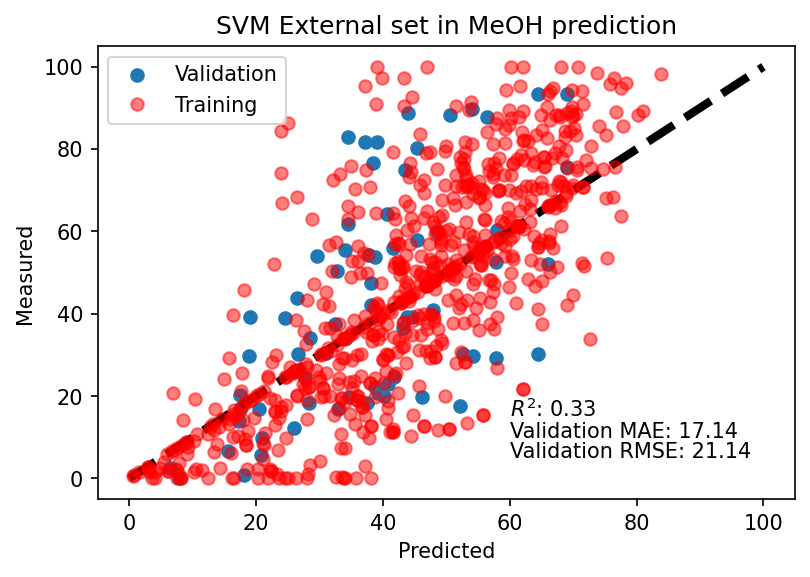

In [24]:
plt.rcParams['figure.dpi'] = 150
fig, ax = plt.subplots()
ax.scatter(Y_Pred_svm,ext_y,label="Validation")
ax.plot( [0,100],[0,100], 'k--', lw=4)
ax.plot(svm_search.best_estimator_.predict(X_train), Y_train, "or", alpha=0.5, label="Training")
ax.text(60,15,r'$R^2$: {:0.2f}'.format(r2_score(ext_y,Y_Pred_svm)))
ax.text(60,10,'Validation MAE: {:0.2f}'.format(mean_absolute_error(Y_Pred_svm,ext_y)))
ax.text(60,5,'Validation RMSE: {:0.2f}'.format(np.sqrt(mean_squared_error(Y_Pred_svm,ext_y))))
ax.set_xlabel('Predicted')
ax.set_ylabel('Measured')
ax.set_title('SVM External set in MeOH prediction')
plt.legend()
plt.show()

### XGBOOST

In [26]:
import xgboost as xgb

In [27]:
%%time

rng = np.random.RandomState(0)
steps_xg = [('scaler', StandardScaler()),
        ('XGB', xgb.XGBRegressor(random_state=rng))] #when subsample is used
pipeline_xg = Pipeline(steps_xg)
parameters_xg = {"XGB__n_estimators": [50, 100, 250, 1000],
              "XGB__learning_rate": [0.01, 0.05, 0.1],
              "XGB__max_depth": [6],
              "XGB__colsample_bytree": [0.7],
              "XGB__min_child_weight": [5, 15],
              "XGB__subsample": [0.5]}

XGB_cv = GridSearchCV(pipeline_xg, param_grid = parameters_xg, cv = 5)
XGB_cv.fit(X_train, Y_train)

CPU times: total: 10min 11s
Wall time: 3min 41s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('XGB',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None, gpu_id=None,
                                                     grow_policy=None,
                                                     importance_type=Non...
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=124102743, ...))]),
             param_grid={'XGB__colsample_bytree': [0.7],
                         'XGB__learning_rate': [0.01, 0.05, 0.1],
                         'XGB__max_depth': [6],
                         'XGB__min_child_weight': [5, 15],
                         'XGB__n_estimators': [50, 100, 250, 1000],
                         'XGB__subsample': [0.5]})

In [28]:
XGB_cv.best_params_

{'XGB__colsample_bytree': 0.7,
 'XGB__learning_rate': 0.01,
 'XGB__max_depth': 6,
 'XGB__min_child_weight': 15,
 'XGB__n_estimators': 1000,
 'XGB__subsample': 0.5}

In [29]:
XGB_cv.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=0.7, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.01,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None, min_child_weight=15,
                              missing=nan, monotone_constraints=None,
                              n_estimators=1000, n_jobs=None,
                              num_parallel_tree=None, predictor=None,
                              random_state=209652396, ...))])

In [30]:
XGB_Y_Pred = XGB_cv.best_estimator_.predict(ext_X)

In [32]:
mse_xg = mean_squared_error(ext_y, XGB_Y_Pred)
print(math.sqrt(mse_xg))

23.250977020337118


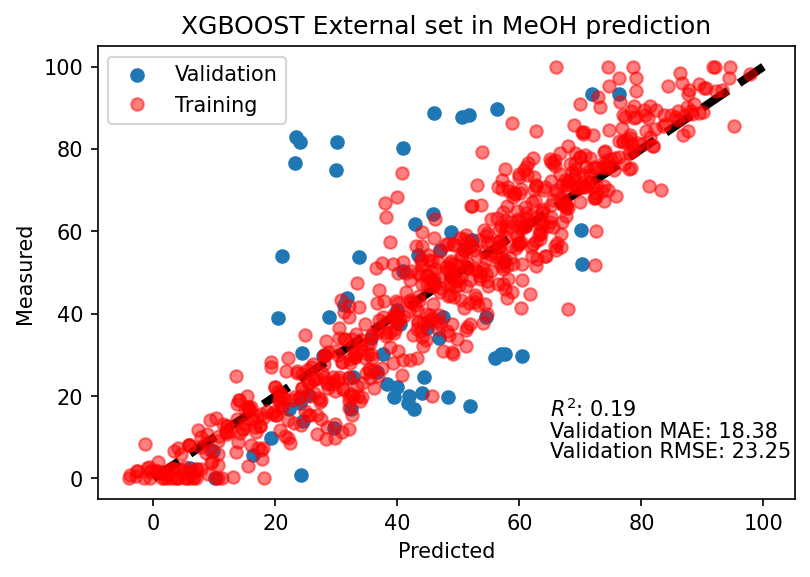

In [33]:
plt.rcParams['figure.dpi'] = 150
fig, ax = plt.subplots()
ax.scatter(XGB_Y_Pred,ext_y,label="Validation")
ax.plot( [0,100],[0,100], 'k--', lw=4)
ax.plot(XGB_cv.predict(X_train), Y_train, "or", alpha=0.5, label="Training")
ax.text(65,15,r'$R^2$: {:0.2f}'.format(r2_score(ext_y,XGB_Y_Pred)))    #make sure actual first predict next!
ax.text(65,10,'Validation MAE: {:0.2f}'.format(mean_absolute_error(ext_y,XGB_Y_Pred)))
ax.text(65,5,'Validation RMSE: {:0.2f}'.format(np.sqrt(mean_squared_error(ext_y,XGB_Y_Pred))))
ax.set_xlabel('Predicted')
ax.set_ylabel('Measured')
ax.set_title('XGBOOST External set in MeOH prediction')
plt.legend()
plt.show()

### Conclusion:

All the models are performing poor for the MeOH solvent. EtOH is comparitively better for the electrophiles evaluation.